In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
df = pd.read_csv('data/Top_Influencers.csv', encoding_errors='ignore')
df

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,\nkhabib_nurmagomedov,63,33.6m,680.6k,4.6k,0.009,305.7k,3.1b,Russia
196,197,\ndanbilzerian,84,33.6m,2.2m,1.4k,0.064,2.1m,3.0b,Canada
197,198,\nraisa6690,80,33.6m,227.8k,4.2k,0.003,103.2k,955.9m,Indonesia
198,199,\nluansantana,79,33.5m,193.3k,865,0.003,82.6k,167.2m,Brazil


In [3]:
# need to preprocess some columns - convert to integers
cols_for_num = ['Followers', 'Avg. Likes', 'Posts', 'New Post Avg. Likes', 'Total Likes']

for col in cols_for_num:
    for i in range(len(df[col])):
       if str(df[col][i])[-1:]=='k':
            df[col][i] = str(df[col][i])[0:len(str(df[col][i]))-3]+ str(df[col][i])[-2:-1]+'00'
       elif str(df[col][i])[-1:]=='m':
            df[col][i] = str(df[col][i])[0:len(str(df[col][i]))-3]+ str(df[col][i])[-2:-1]+'00000'
       elif str(df[col][i])[-1:]=='b':
            df[col][i] = str(df[col][i])[0:len(str(df[col][i]))-3]+ str(df[col][i])[-2:-1]+'00000000'
       else:
            df[col][i] = str(df[col][i])

for col in cols_for_num:
     df[col] = pd.to_numeric(df[col], errors='coerce')

df.sample(5)

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
74,75,\nmilliebobbybrown,80,58600000,4100000,290,0.082,4800000,1200000000,United States
104,105,\nlelepons,81,49700000,2400000,2500,0.031,1500000,6100000000,United States
195,196,\nkhabib_nurmagomedov,63,33600000,680600,4600,0.009,305700,3100000000,Russia
44,45,\nvictoriassecret,88,73400000,144800,3000,0.000,25900,432000000,United States
171,172,\neminem,84,36600000,988400,691,0.011,382500,683000000,United States


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 200 non-null    int64  
 1   Channel Info         200 non-null    object 
 2   Influence Score      200 non-null    int64  
 3   Followers            200 non-null    int64  
 4   Avg. Likes           200 non-null    int64  
 5   Posts                200 non-null    int64  
 6   60-Day Eng Rate      200 non-null    float64
 7   New Post Avg. Likes  200 non-null    int64  
 8   Total Likes          200 non-null    int64  
 9   Country Or Region    137 non-null    object 
dtypes: float64(1), int64(7), object(2)
memory usage: 15.8+ KB


In [5]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

,Rank,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes
count,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00
mean,100.50,81.85,78491000.00,1785050.00,3460.43,0.02,1224083.00,3644949000.00
std,57.88,8.88,74920154.61,2192133.48,3327.88,0.03,1857624.20,5563069303.62
min,1.00,22.00,33400000.00,63500.00,20.00,0.00,0.00,22800000.00
25%,50.75,80.00,40675000.00,499050.00,938.25,0.00,218775.00,1075000000.00
50%,100.50,84.00,50950000.00,1100000.00,2100.00,0.01,567150.00,2050000000.00
75%,150.25,86.00,70500000.00,2125000.00,5025.00,0.02,1300000.00,4025000000.00
max,200.00,93.00,485200000.00,15400000.00,16900.00,0.25,12900000.00,57400000000.00


<AxesSubplot: >

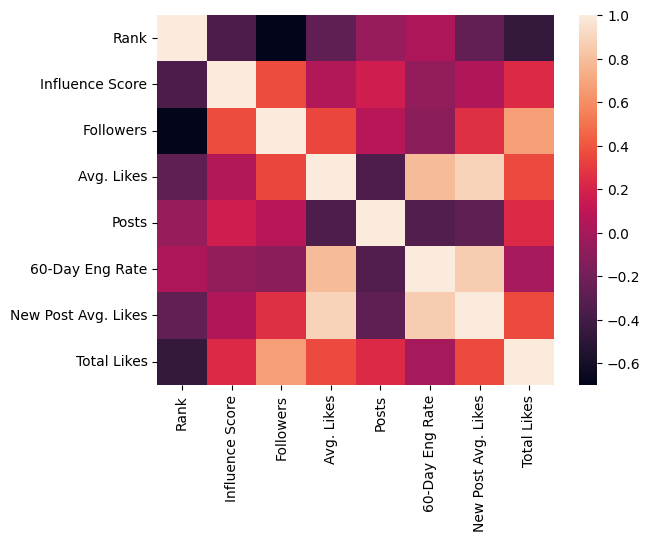

In [6]:
sns.heatmap(df.corr())